# Energy Efficiency

## Links
https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set/data

# Rationale


In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from scipy.optimize import root


from scipy.optimize import minimize
import scipy.stats as stats
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.linear_model import Ridge, Lasso
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/energy_efficiency_data.csv')

In [3]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# Observe the data's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Check for any missing values in the data

In [5]:
missing_values = df.isnull().sum()
#print(missing_values)

The dataset did not have missing values. 

The next step is to analyze the data in separate pairplots to look for any existing patterns. The two following pairplots are color coded to reflect the comparisons with the two different target features: heating load and cooling load. 

The bottom rows and last column of the next two pairplots shows the correlations to the other target variable.

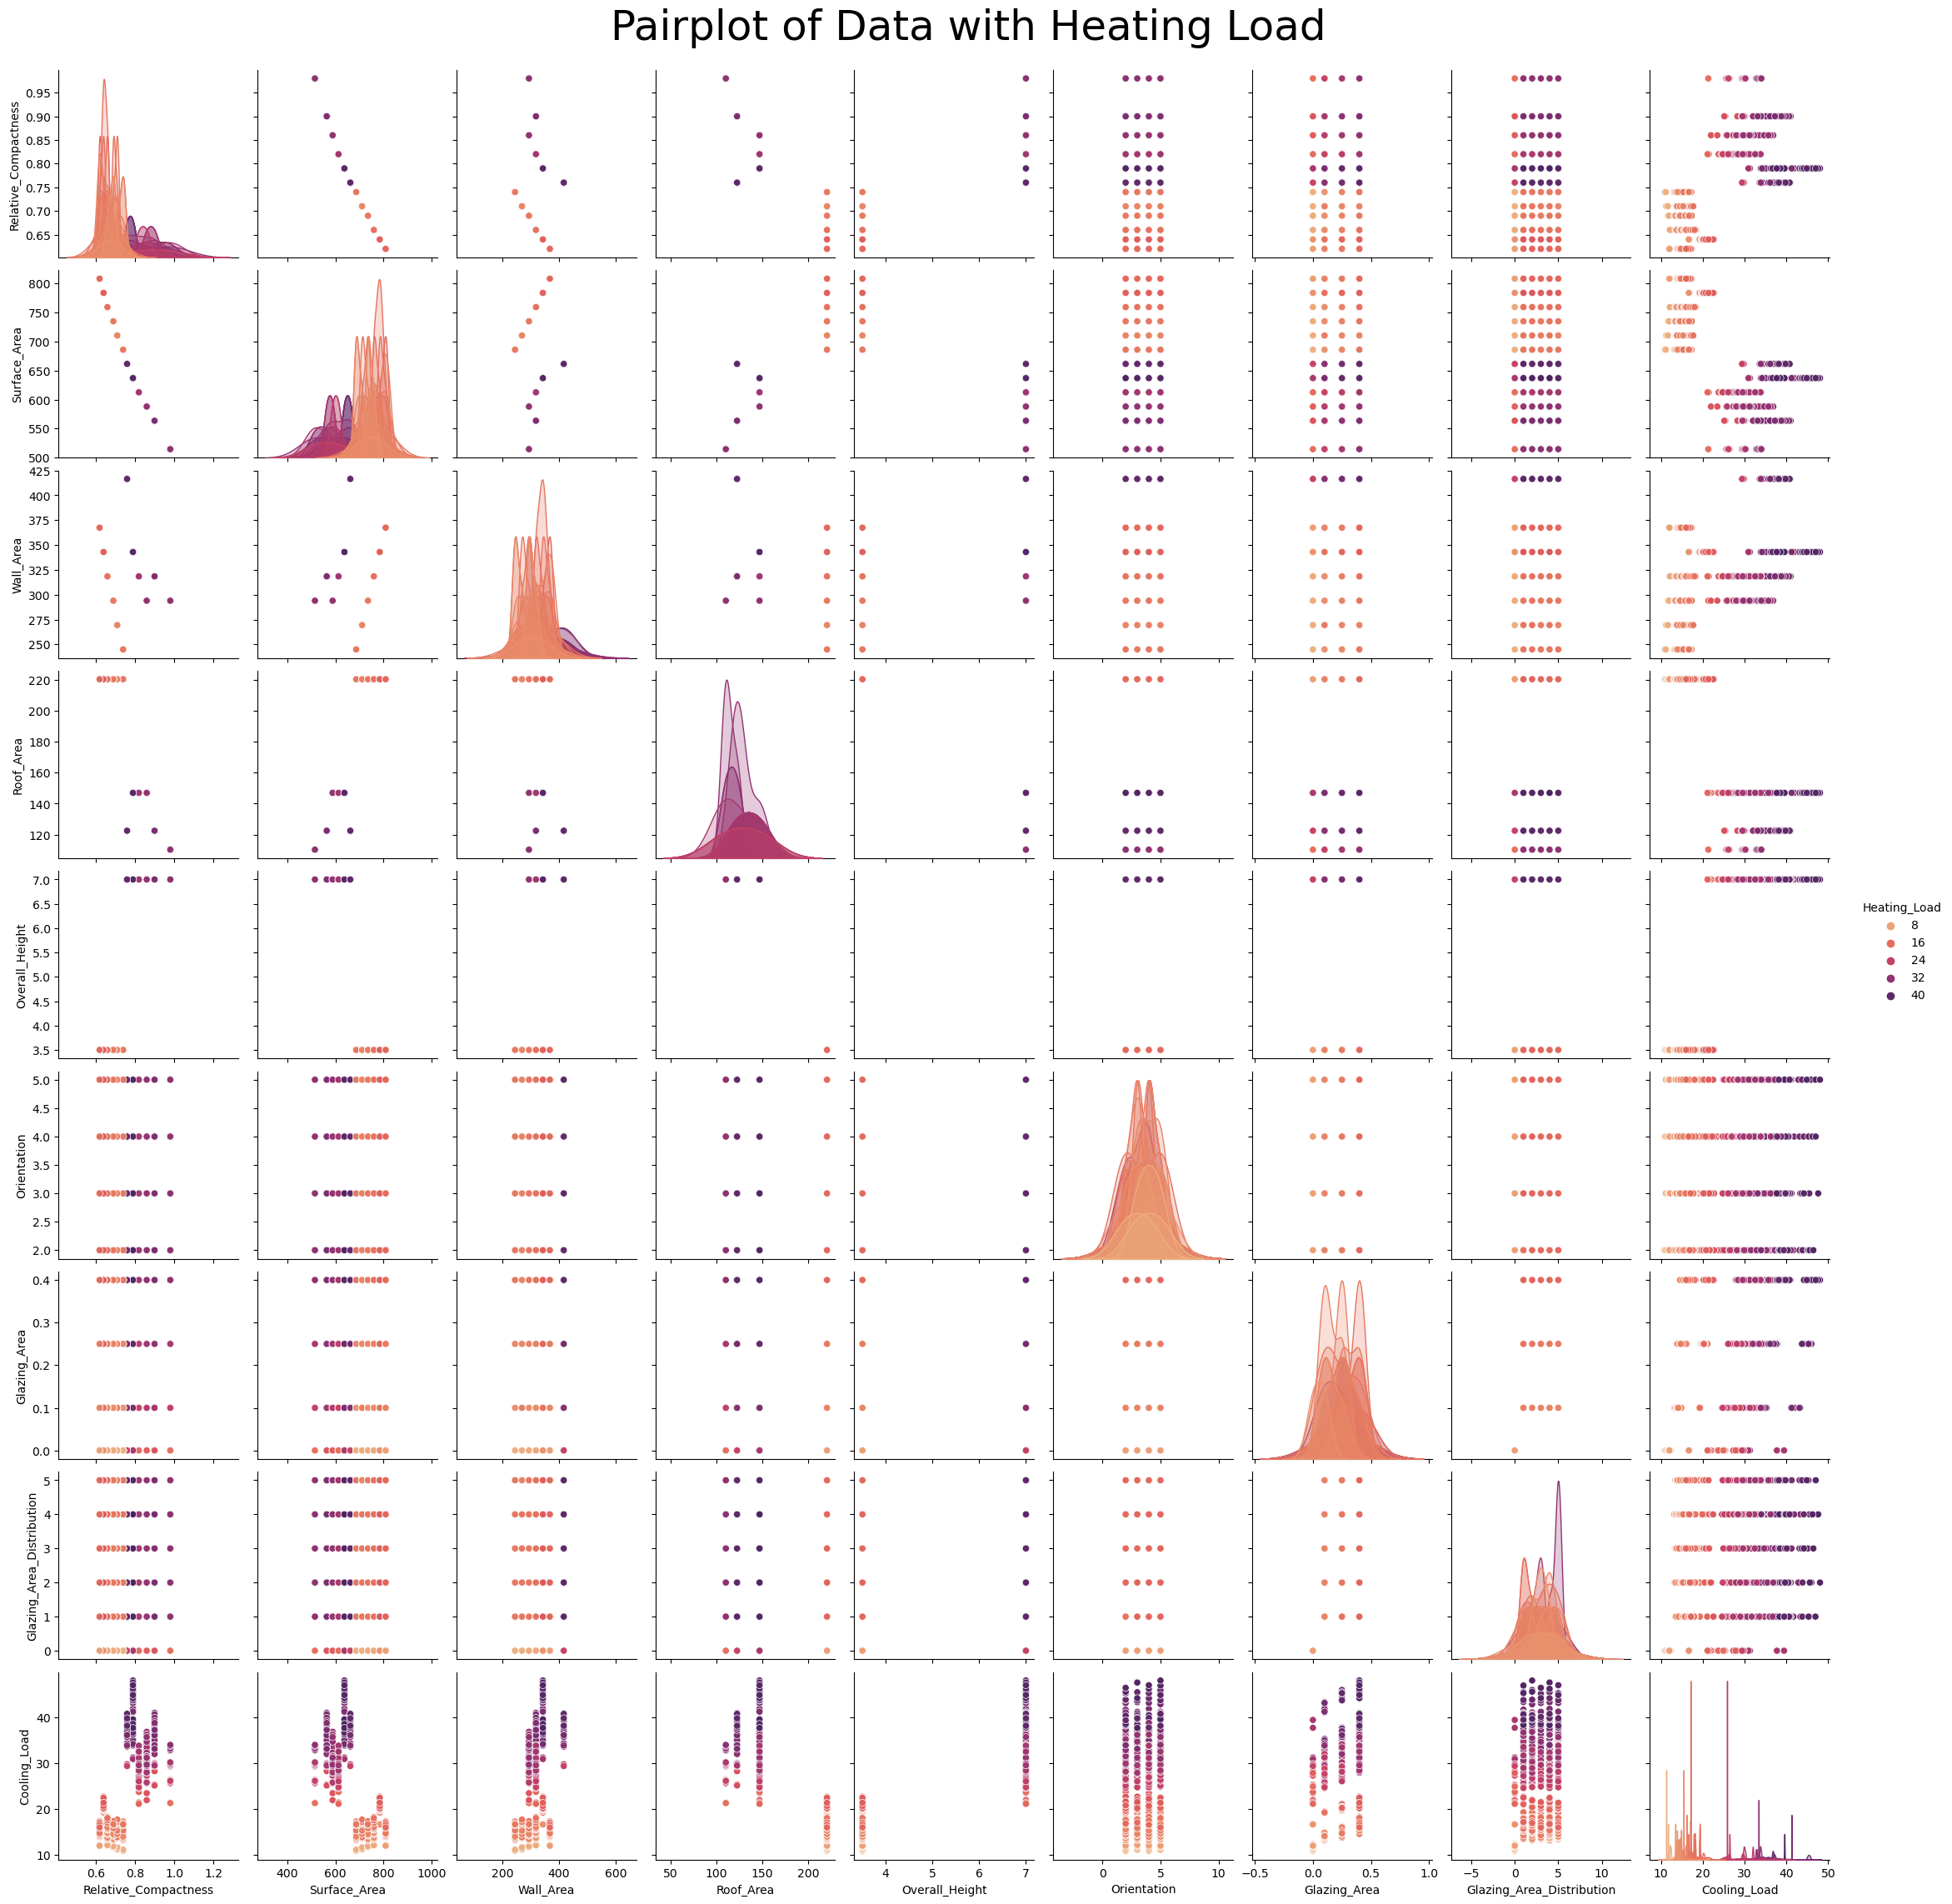

In [6]:
pp = sns.pairplot(df,hue='Heating_Load',palette='flare')
pp.fig.suptitle('Pairplot of Data with Heating Load', y=1.02, fontsize=36) 
plt.show()

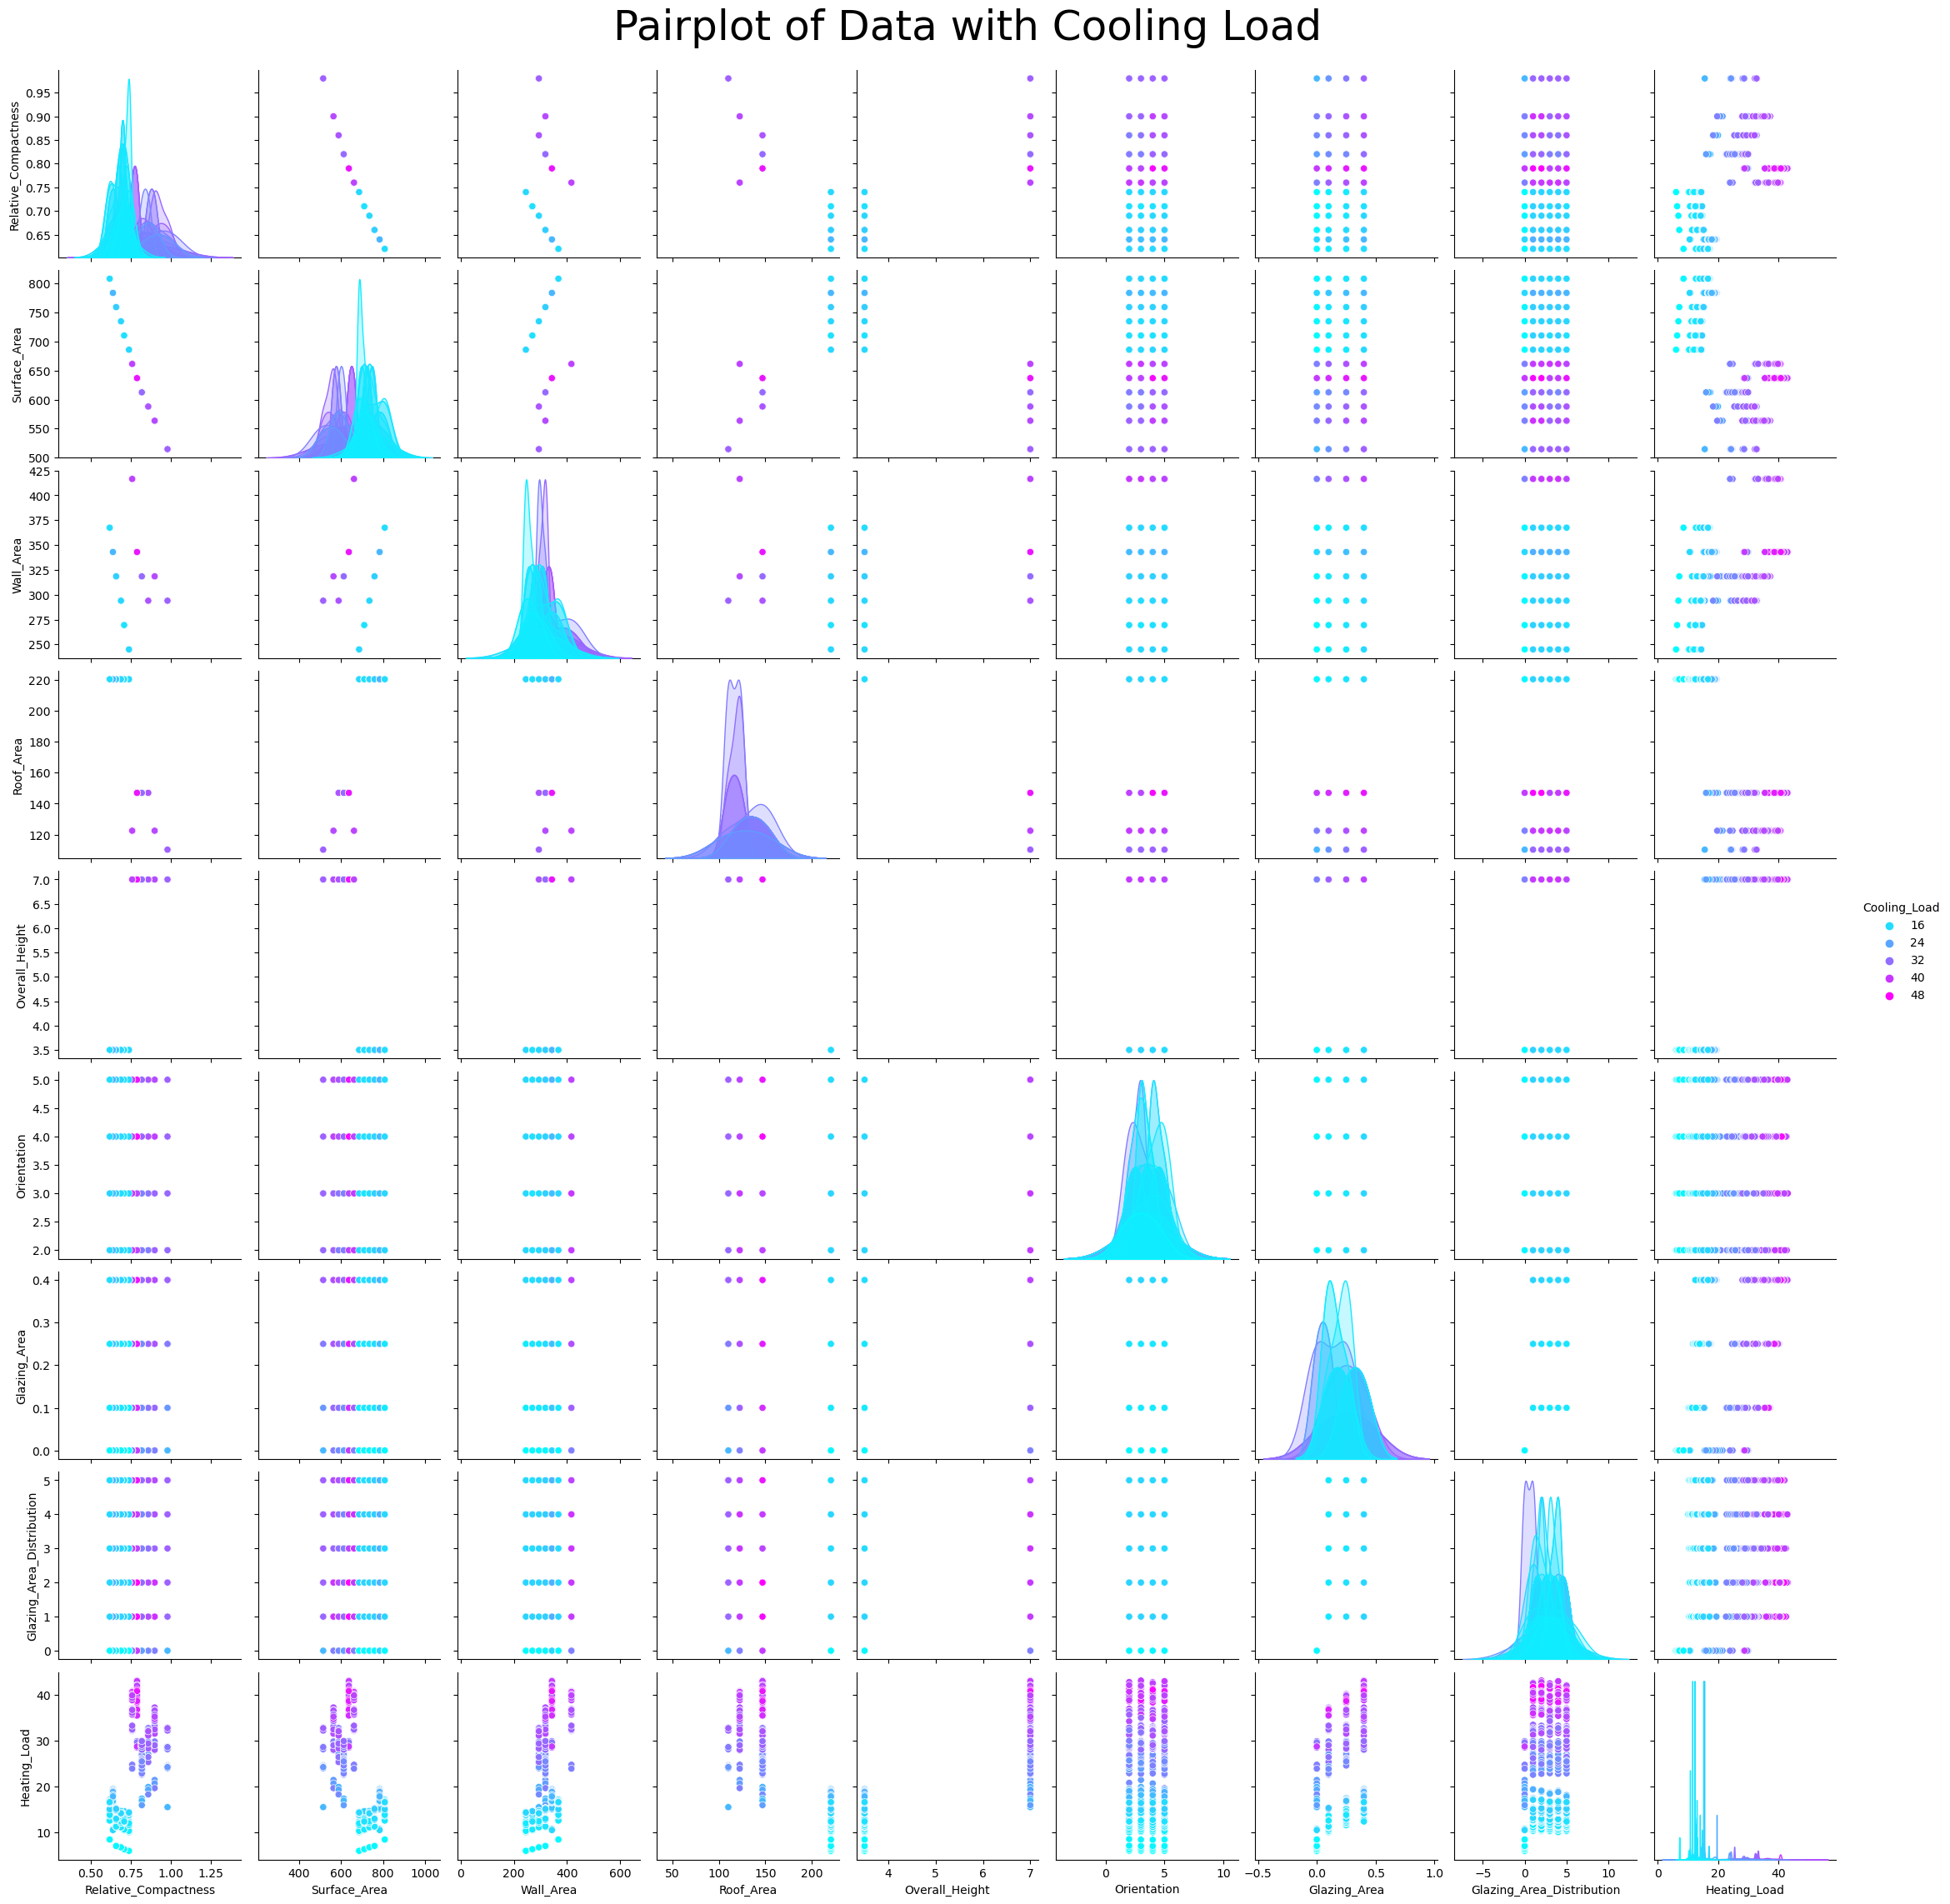

In [7]:
pp2 = sns.pairplot(df,hue='Cooling_Load',palette='cool')
pp2.fig.suptitle('Pairplot of Data with Cooling Load', y=1.02, fontsize=36) 
plt.show()

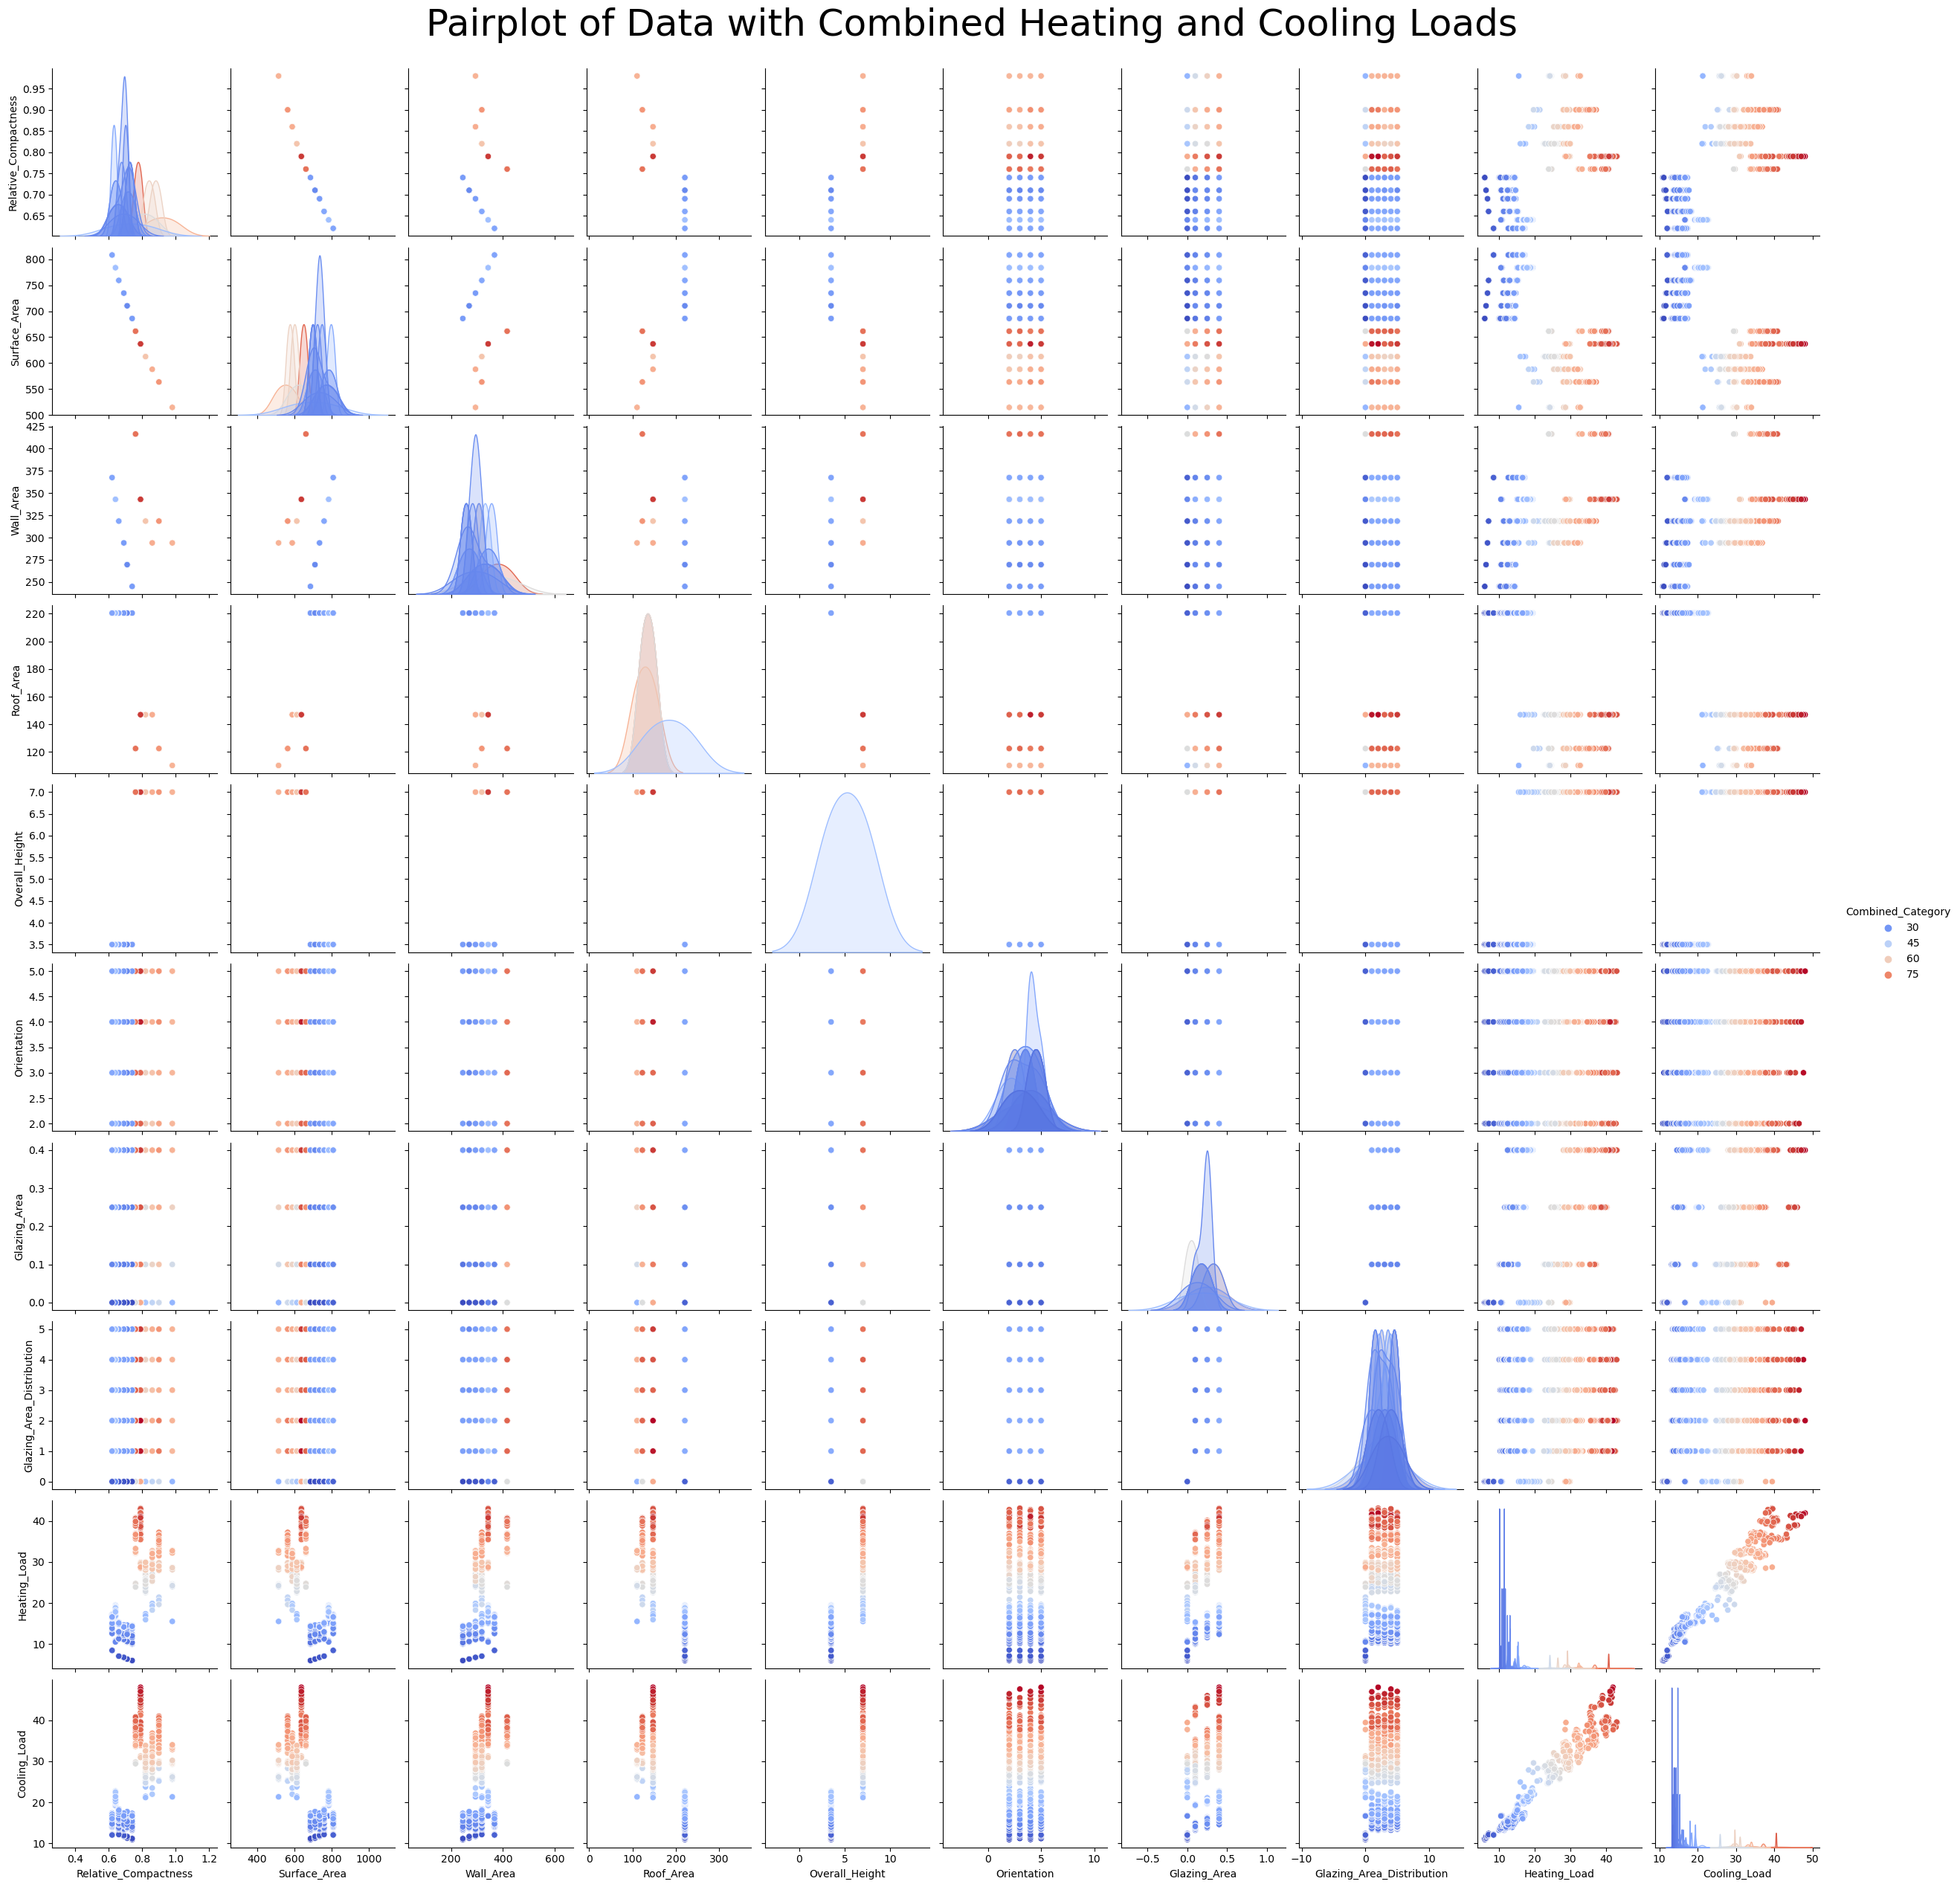

In [8]:
df_combined = df
df_combined['Combined_Category'] = df_combined['Cooling_Load'] + df_combined['Heating_Load']


pp3 = sns.pairplot(df_combined,hue='Combined_Category',palette='coolwarm')
pp3.fig.suptitle('Pairplot of Data with Combined Heating and Cooling Loads', y=1.02, fontsize=36) 
plt.show()
df = df.drop('Combined_Category', axis=1)

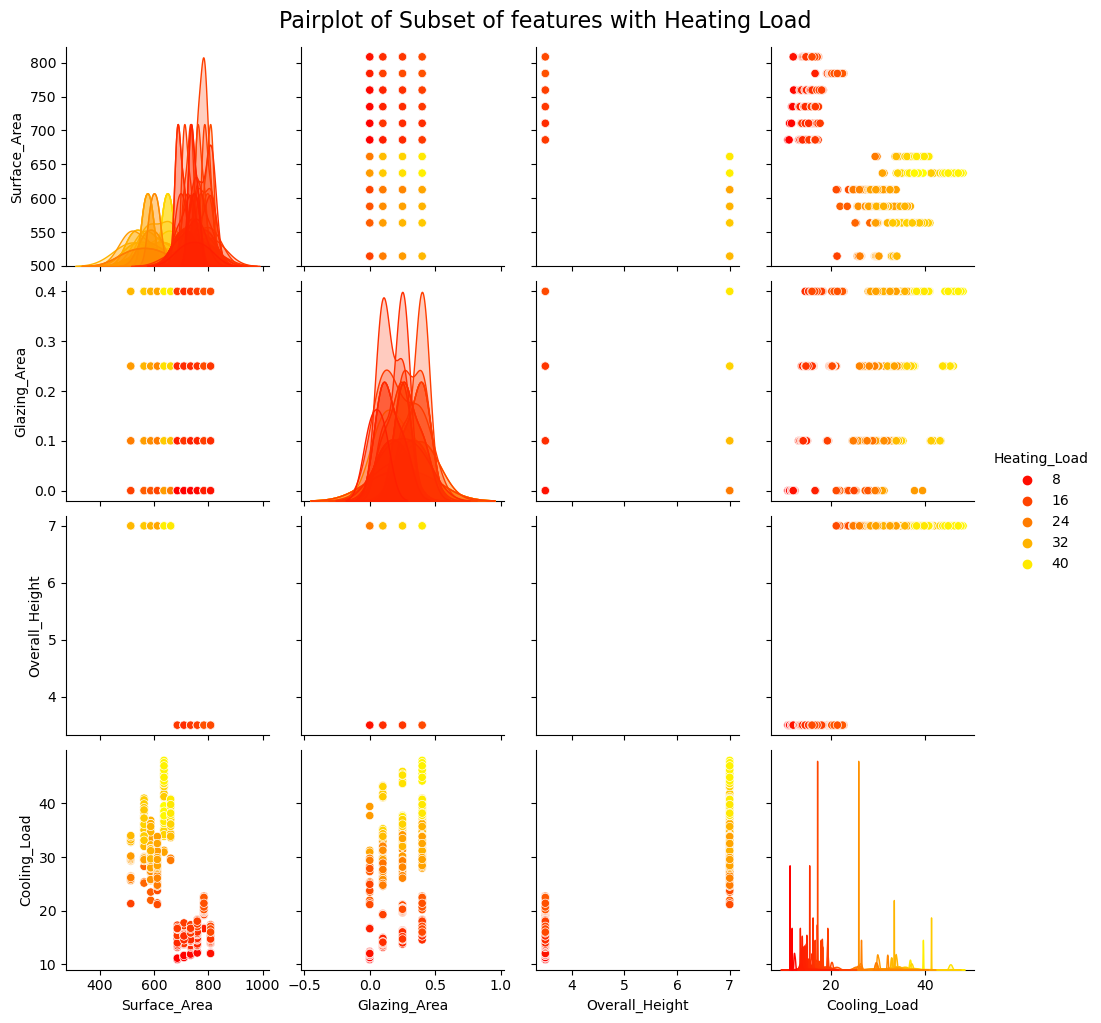

In [9]:
selected_features = ['Surface_Area', 'Glazing_Area', 'Overall_Height', 'Cooling_Load', 'Heating_Load']
subset_df = df[selected_features]



pp4=sns.pairplot(subset_df, hue='Heating_Load',palette='autumn')
pp4.fig.suptitle('Pairplot of Subset of features with Heating Load', y=1.02, fontsize=16) 

plt.show()

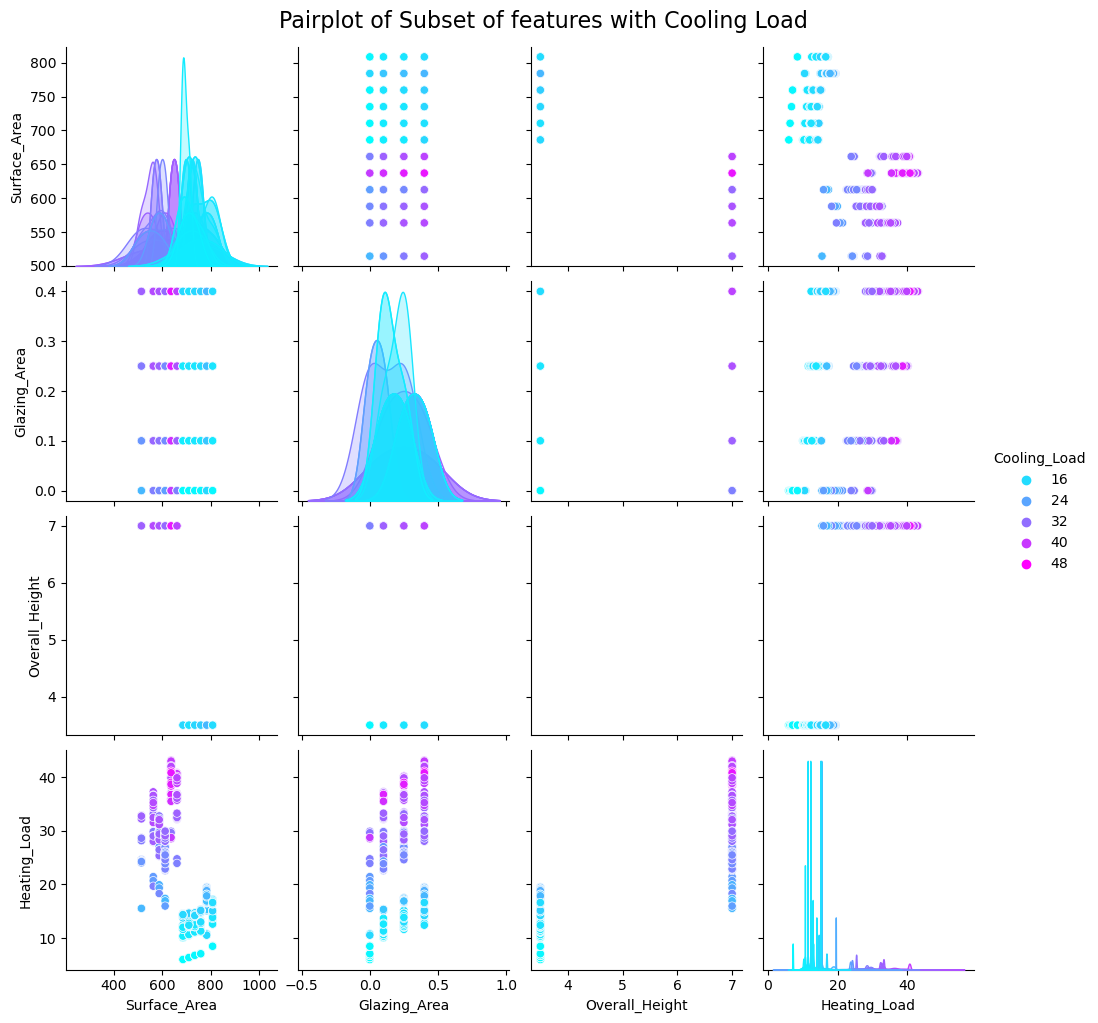

In [10]:
pp5 = sns.pairplot(subset_df, hue='Cooling_Load',palette='cool')
pp5.fig.suptitle('Pairplot of Subset of features with Cooling Load', y=1.02, fontsize=16) 

plt.show()

After the pairplot analysis, I wanted to zoom in and see some of these relationships in greater detail. 

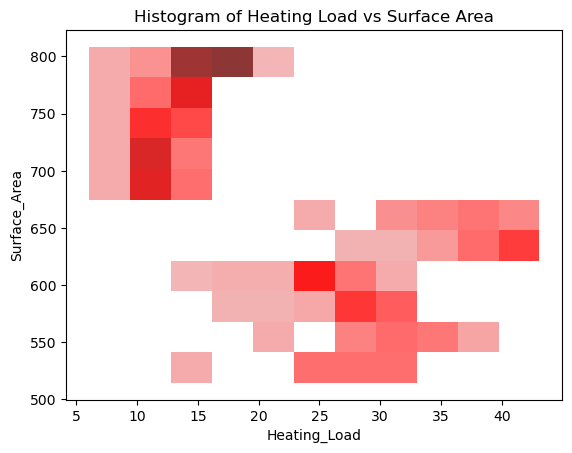

In [11]:
sns.histplot(subset_df, x=subset_df['Heating_Load'],y=subset_df['Surface_Area'],color='red')
plt.title('Histogram of Heating Load vs Surface Area')
plt.show()

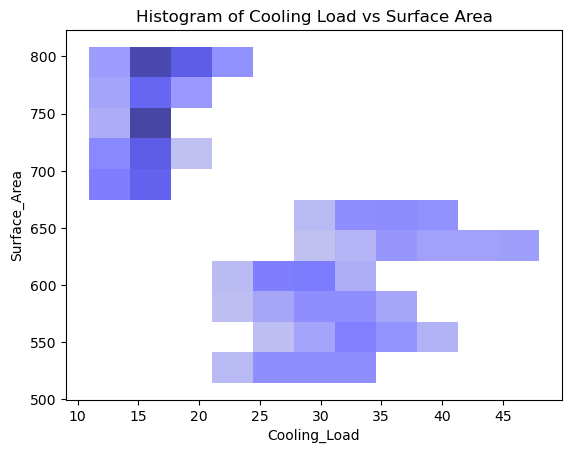

In [12]:
sns.histplot(subset_df, x=subset_df['Cooling_Load'],y=subset_df['Surface_Area'],color='blue')
plt.title('Histogram of Cooling Load vs Surface Area')
plt.show()

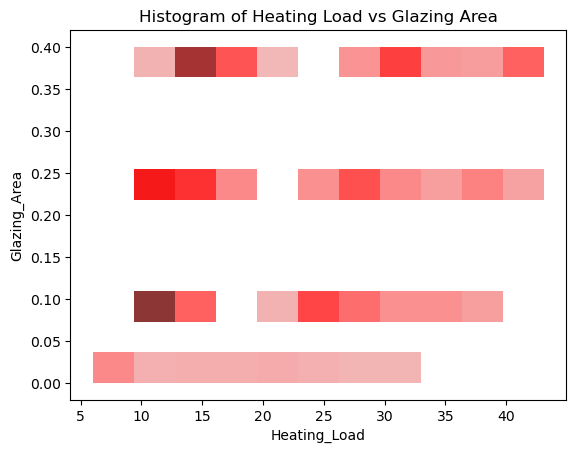

In [13]:
sns.histplot(subset_df, x=subset_df['Heating_Load'],y=subset_df['Glazing_Area'],color='red')
plt.title('Histogram of Heating Load vs Glazing Area')
plt.show()

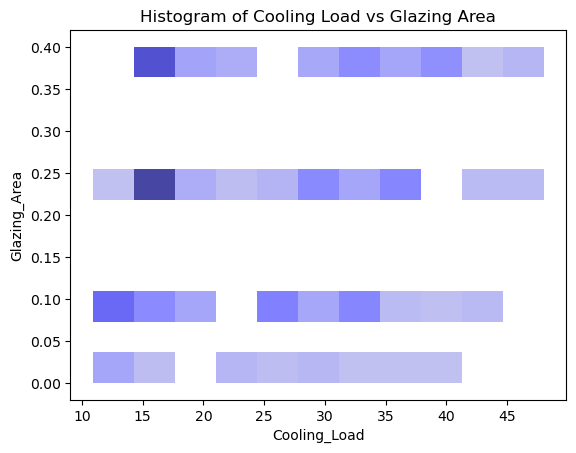

In [14]:
sns.histplot(subset_df, x=subset_df['Cooling_Load'],y=subset_df['Glazing_Area'],color='blue')
plt.title('Histogram of Cooling Load vs Glazing Area')
plt.show()

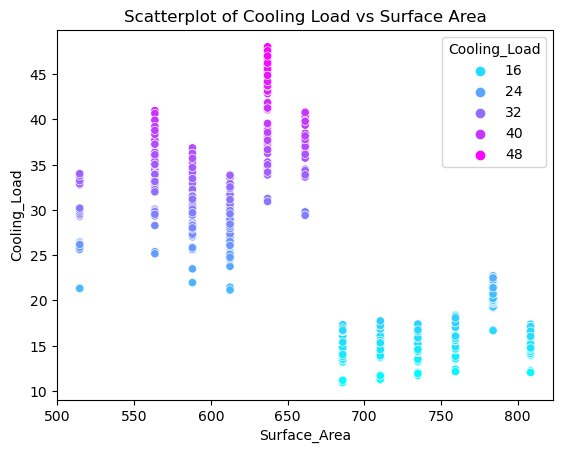

In [15]:
sns.scatterplot(x = df["Surface_Area"], y = df["Cooling_Load"], palette='cool', hue=df["Cooling_Load"]);
plt.title('Scatterplot of Cooling Load vs Surface Area')
plt.show()


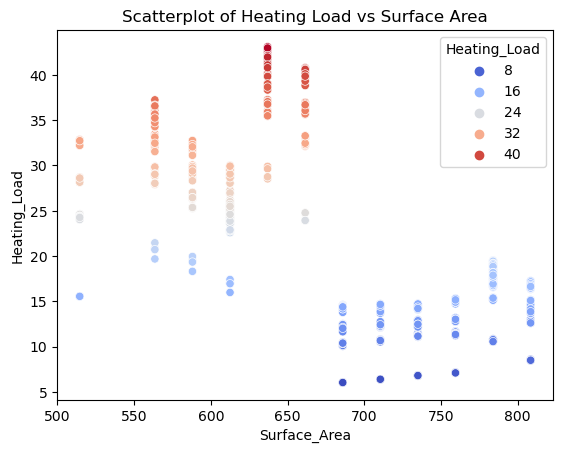

In [16]:
sns.scatterplot(x = df["Surface_Area"], y = df["Heating_Load"],hue=df['Heating_Load'], palette='coolwarm');
plt.title('Scatterplot of Heating Load vs Surface Area')
plt.show()




In [17]:
#sns.pairplot(df, hue=df["Cooling_Load"])
#sns.pairplot(df, hue='Cooling_Load', markers=["o", "s"], kind='scatter')

corr_matrix = df.corr()


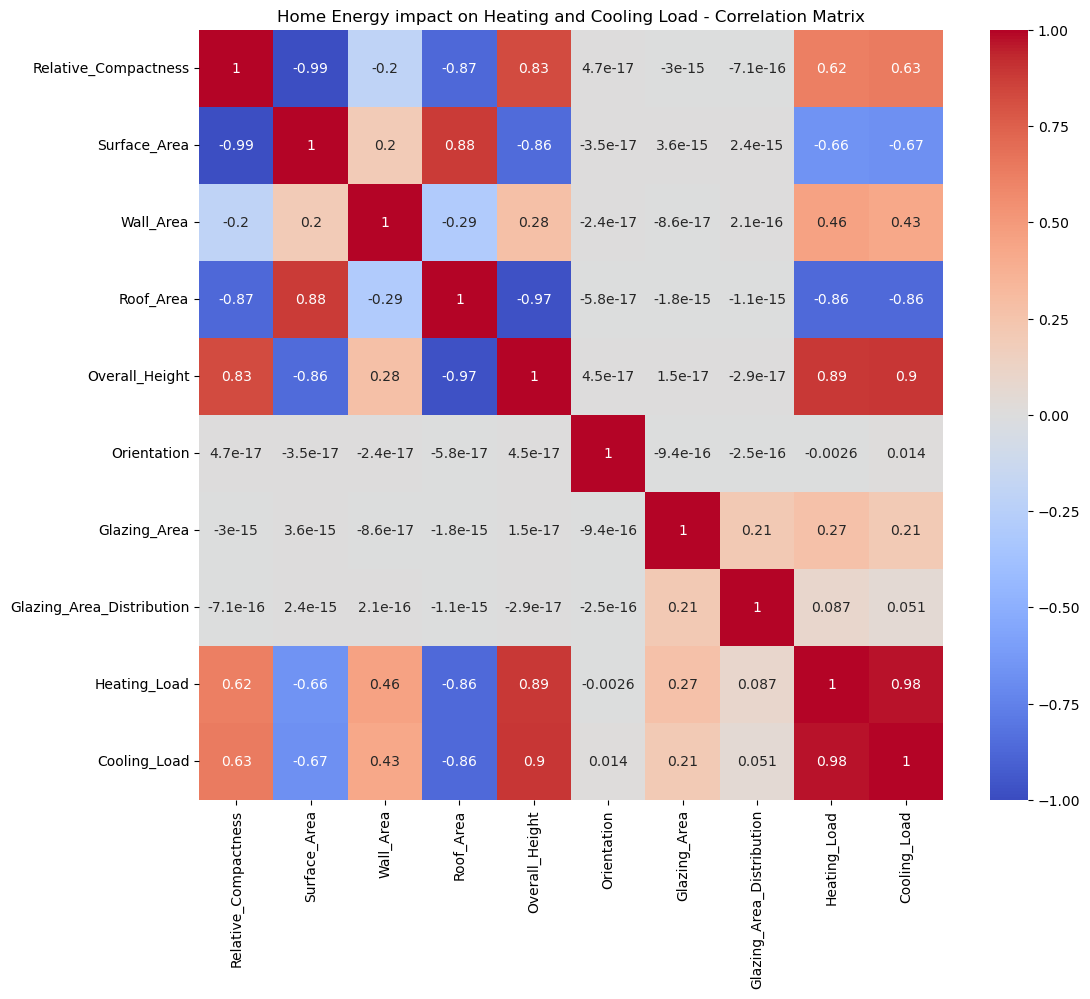

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Home Energy impact on Heating and Cooling Load - Correlation Matrix')
plt.show()

In [19]:
#df.info()

In [20]:
#print(corr_matrix)

I am not sure about dropping any features at this time. I am still debating dropping roof area. 

In [21]:
#df.describe()

# Polynomial Features
After exploring both more and less correlated features, I decided that the use of Polynomial Features was not adding anything of value to my data. This was due to high multicollinearity of some features. But also because there are some features with many zeroes in them, which would just lead to more zeroes. 

This was a dead-end, but I felt it was a worthwhile learning exploration. I have removed the code for clarity in the notebook. 

## What are we predicting? 

We will be predicting high Heating_Load and high cooling Cooling_Load based on the contributing features in this dataset. 

* UPDATE 

We will be predicting whether or not a residential structure is efficient or inefficient based on features in the dataset. The outcomes will be decided along the normalized means of the data. 

# Comparing model performance

Comparing the results and performance of RandomForest, Ridge, and Lasso regrssion models. 

In [22]:
# Drop highly correlated features
#df_reduced = df.drop(columns=['Surface_Area', 'Roof_Area']) 




df_reduced = df

# Random Forest actually performs better if I don't drop any features - even highly correlated features



# Prepare the data
X = df_reduced.drop(columns=['Heating_Load', 'Cooling_Load'])
y_heating = df_reduced['Heating_Load']
y_cooling = df_reduced['Cooling_Load']

# Split the data
X_train, X_test, y_train_heating, y_test_heating = train_test_split(X, y_heating, test_size=0.2, random_state=42)
X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

# Random Forest Model for Heating Load
rf_heating = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heating.fit(X_train, y_train_heating)
y_pred_heating_rf = rf_heating.predict(X_test)

# Evaluate the model
print("Heating Load (RF) - R2 Score:", r2_score(y_test_heating, y_pred_heating_rf))
print("Heating Load (RF) - MSE:", mean_squared_error(y_test_heating, y_pred_heating_rf))

# Random Forest Model for Cooling Load
rf_cooling = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cooling.fit(X_train, y_train_cooling)
y_pred_cooling_rf = rf_cooling.predict(X_test)

# Evaluate the model
print("Cooling Load (RF) - R2 Score:", r2_score(y_test_cooling, y_pred_cooling_rf))
print("Cooling Load (RF) - MSE:", mean_squared_error(y_test_cooling, y_pred_cooling_rf))

# Ridge Regression for comparison
ridge_heating = Ridge(alpha=1.0)
ridge_heating.fit(X_train, y_train_heating)
y_pred_heating_ridge = ridge_heating.predict(X_test)

print("Heating Load (Ridge) - R2 Score:", r2_score(y_test_heating, y_pred_heating_ridge))
print("Heating Load (Ridge) - MSE:", mean_squared_error(y_test_heating, y_pred_heating_ridge))


ridge_cooling = Ridge(alpha=1.0)
ridge_cooling.fit(X_train, y_train_cooling)
y_pred_cooling_ridge = ridge_cooling.predict(X_test)

print("Cooling Load (Ridge) - R2 Score:", r2_score(y_test_cooling, y_pred_cooling_ridge))
print("Cooling Load (Ridge) - MSE:", mean_squared_error(y_test_cooling, y_pred_cooling_ridge))






# Lasso Regression for comparison
lasso_heating = Lasso(alpha=0.1)
lasso_heating.fit(X_train, y_train_heating)
y_pred_heating_lasso = lasso_heating.predict(X_test)

print("Heating Load (Lasso) - R2 Score:", r2_score(y_test_heating, y_pred_heating_lasso))
print("Heating Load (Lasso) - MSE:", mean_squared_error(y_test_heating, y_pred_heating_lasso))



lasso_cooling = Lasso(alpha=0.1)
lasso_cooling.fit(X_train, y_train_cooling)
y_pred_cooling_lasso = lasso_cooling.predict(X_test)

print("Cooling Load (Lasso) - R2 Score:", r2_score(y_test_cooling, y_pred_cooling_lasso))
print("Cooling Load (Lasso) - MSE:", mean_squared_error(y_test_cooling, y_pred_cooling_lasso))


Heating Load (RF) - R2 Score: 0.9976889700896121
Heating Load (RF) - MSE: 0.24088222909090704
Cooling Load (RF) - R2 Score: 0.9683338660414131
Cooling Load (RF) - MSE: 2.9340964745454556
Heating Load (Ridge) - R2 Score: 0.9073844963095999
Heating Load (Ridge) - MSE: 9.65345748103101
Cooling Load (Ridge) - R2 Score: 0.8883487260437097
Cooling Load (Ridge) - MSE: 10.345298536350903
Heating Load (Lasso) - R2 Score: 0.9032058249778351
Heating Load (Lasso) - MSE: 10.08900686985949
Cooling Load (Lasso) - R2 Score: 0.8808429347046199
Cooling Load (Lasso) - MSE: 11.040764422255966


# Random Forest is the clear winner
After experimenting with the full dataset, as well as trying variants with select features removed, I have found that Random Forest performs best repeatedly. 

I chose to go with Random Forest because it consistently produced noticeably higher R2 scores and lower MSE than Ridge and Lasso.

# Feature importance for the two targets
How are the features ranked according to their importance or influence on the target variables? 

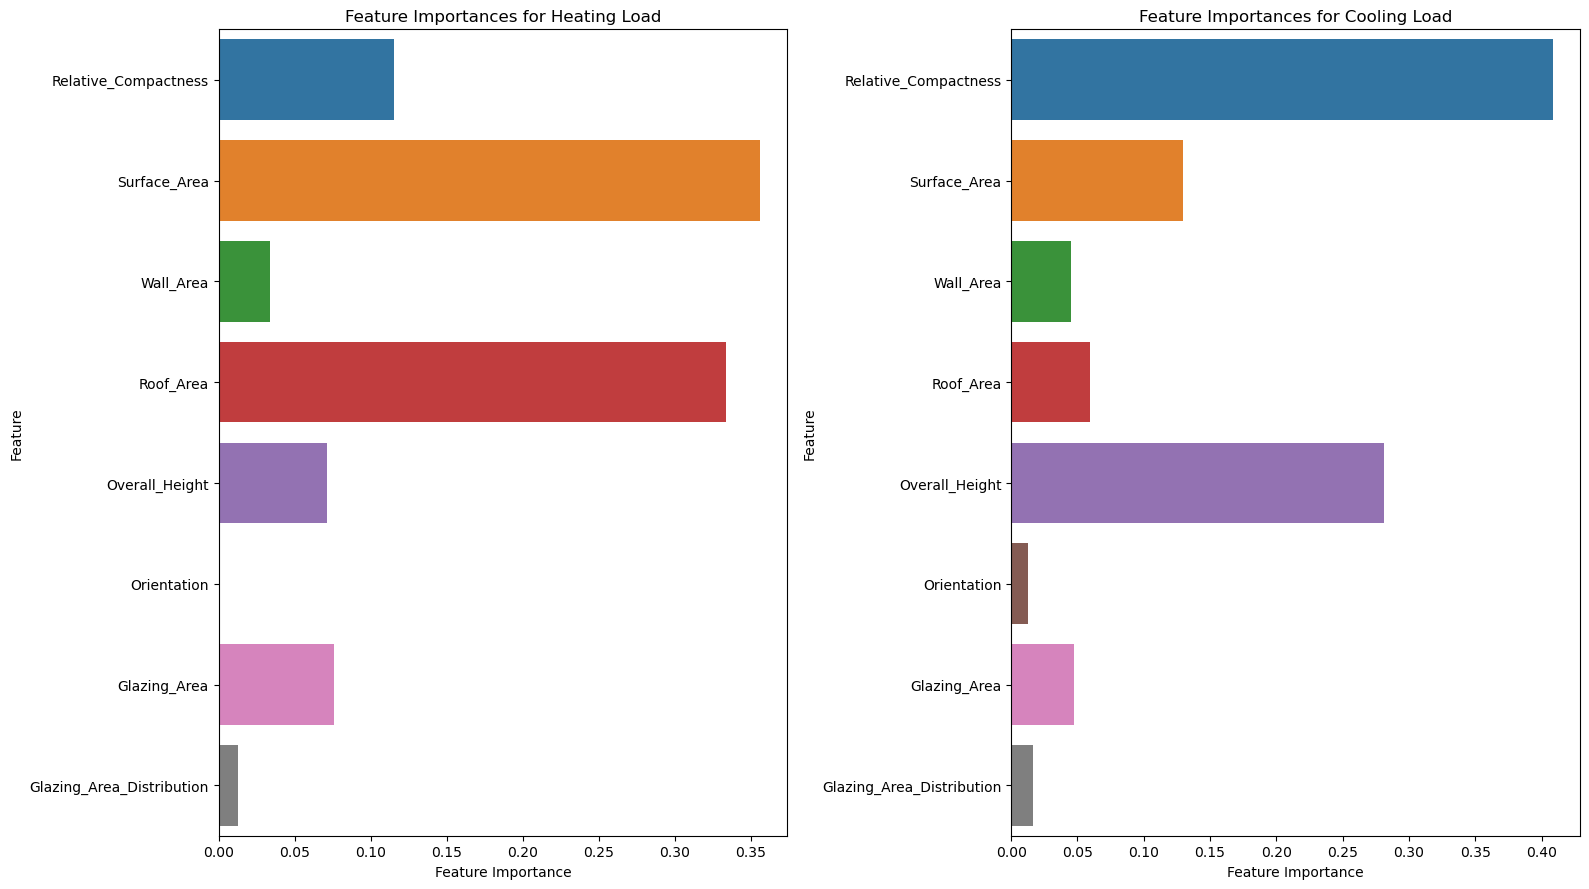

In [23]:
X = df.drop(columns=['Heating_Load', 'Cooling_Load'])
y_heating = df['Heating_Load']
y_cooling = df['Cooling_Load']

# Random Forest Model for Heating Load
rf_heating = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heating.fit(X, y_heating)

# Random Forest Model for Cooling Load
rf_cooling = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cooling.fit(X, y_cooling)

# Extract feature importances
feature_importances_heating = pd.Series(rf_heating.feature_importances_, index=X.columns)
feature_importances_cooling = pd.Series(rf_cooling.feature_importances_, index=X.columns)


# Print feature importances
#print("Feature Importances for Heating Load:")
#print(feature_importances_heating)

#print("\nFeature Importances for Cooling Load:")
#print(feature_importances_cooling)




# Plot feature importances
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
sns.barplot(x=feature_importances_heating, y=feature_importances_heating.index)
plt.title('Feature Importances for Heating Load')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

plt.subplot(1, 2, 2)
sns.barplot(x=feature_importances_cooling, y=feature_importances_cooling.index)
plt.title('Feature Importances for Cooling Load')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

# Feature importance results: 
The features that have the most importance for heating load are Surface area and Roof area. The features that have the most importance for cooling load are Relative compactness and overall height. 

## My thoughts at this point
I am not a domain expert in this field, but after pondering these results, it makes more logical sense to me. 

Here's what the data and results tell me about heating load, plus my own intuition about it. For heating a house, surface area matters most (how many square feet need to be heated?) and roof area (how fast is the rising heat being lost?). 

For cooling, a different set of factors matter. How compact is the space (less area to cool requires less energy?) and what is the overall height. This resonates with me, because having lived in both a ranch and a multi-story home, I can say absolutely that the higher floors stay warmer than the lower floors when the air conditioning is running. Higher interior space or volume will lead to a higher cooling load. 


# Cross-validation
Cross-validation results revealed that RandomForest is performing exceptionally well predicting both heating and cooling loads. 

In [24]:
y_heating = df['Heating_Load']
y_cooling = df['Cooling_Load']

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest Model for Heating Load with Cross-Validation
rf_heating = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores_heating = cross_val_score(rf_heating, X, y_heating, cv=kf, scoring='r2')
print(f"Heating Load - Cross-validated R2 Scores: {cv_scores_heating}")
print(f"Heating Load - Average Cross-validated R2 Score: {np.mean(cv_scores_heating)}")

# Random Forest Model for Cooling Load with Cross-Validation
rf_cooling = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores_cooling = cross_val_score(rf_cooling, X, y_cooling, cv=kf, scoring='r2')
print(f"Cooling Load - Cross-validated R2 Scores: {cv_scores_cooling}")
print(f"Cooling Load - Average Cross-validated R2 Score: {np.mean(cv_scores_cooling)}")


Heating Load - Cross-validated R2 Scores: [0.9977673  0.99804105 0.99787937 0.99767239 0.99751477]
Heating Load - Average Cross-validated R2 Score: 0.9977749750644704
Cooling Load - Cross-validated R2 Scores: [0.96765097 0.96829497 0.97797437 0.96207069 0.97691921]
Cooling Load - Average Cross-validated R2 Score: 0.9705820435041417


# Hyperparameter tuning
Using GridSearchCV to find optimal hyperparameters

In [25]:
# Hyperparameter Tuning for Heating Load
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_heating = GridSearchCV(estimator=rf_heating, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1)
grid_search_heating.fit(X, y_heating)
best_rf_heating = grid_search_heating.best_estimator_ # define best fit heating model

print(f"Best Parameters for Heating Load: {grid_search_heating.best_params_}")
print(f"Best R2 Score for Heating Load: {grid_search_heating.best_score_}")

# Hyperparameter Tuning for Cooling Load
grid_search_cooling = GridSearchCV(estimator=rf_cooling, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1)
grid_search_cooling.fit(X, y_cooling)
best_rf_cooling = grid_search_cooling.best_estimator_ # define best fit cooling model 

print(f"Best Parameters for Cooling Load: {grid_search_cooling.best_params_}")
print(f"Best R2 Score for Cooling Load: {grid_search_cooling.best_score_}")


Best Parameters for Heating Load: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score for Heating Load: 0.9977775562433475
Best Parameters for Cooling Load: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score for Cooling Load: 0.970588773003435


## Cross-validation results
I am happy with the results and cross-validation scores of using the RandomForest model. It performed substantially better than the other models I experimented with. Cross-validation R2 scores were  very high. GridSearch also reveals that I don't need 300 estimators, 30 max_depth, 10 samples_split, and 4 min_samples_leaf parameters. 

# Making this make sense to the user
In this next section, I am trying to build a function that allows a user to put new data into the model, have it make predictions of the heating and cooling loads, and then classify the new entry as either efficient or inefficient. 

## Residuals exploration

I examined the residuals for my heating and cooling load predictions and went down a rabbit hole with it. There seemed to be less variance in the cooling load daya, which led me to explore Polynomial Features with some of the less correlated features. 

I then began looking at the few outliers in the data. This is where I began to do more feature engineering on the less correlated features and exploring the results on the Random Forest model. What I found at the end was that my model was getting perfect accuracy - indicating overfitting.

Although this yielded no useful results, I left it in my notebook at the bottom. 

UPDATE: Moving Residuals back in place to fix order of operations errors. 


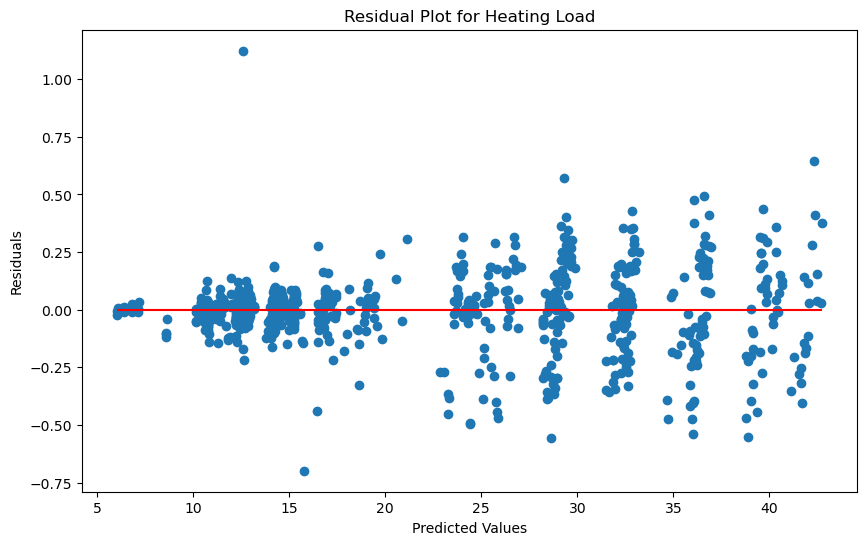

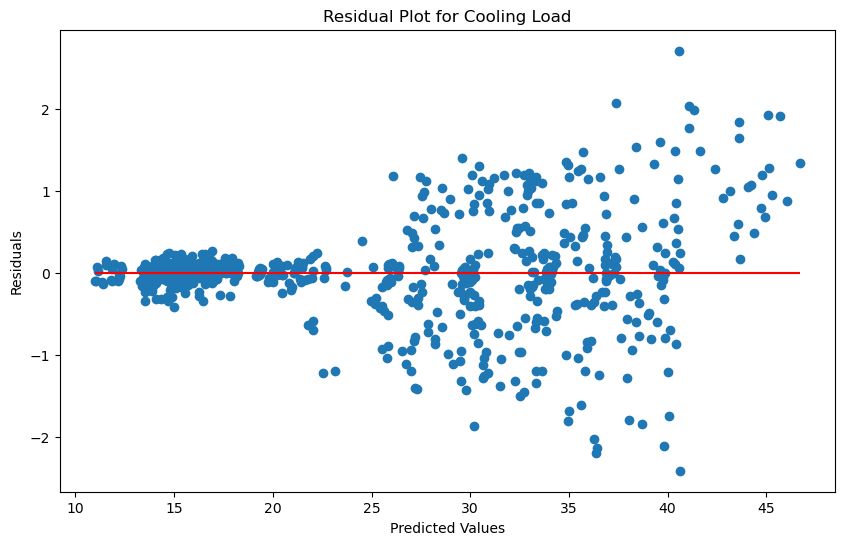

In [26]:
# Fit the best models to the data
best_rf_heating.fit(X, y_heating)
best_rf_cooling.fit(X, y_cooling)

# Predict and analyze residuals for Heating Load
y_pred_heating = best_rf_heating.predict(X)
residuals_heating = y_heating - y_pred_heating

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_heating, residuals_heating)
plt.hlines(y=0, xmin=min(y_pred_heating), xmax=max(y_pred_heating), color='r')
plt.title('Residual Plot for Heating Load')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Predict and analyze residuals for Cooling Load
y_pred_cooling = best_rf_cooling.predict(X)
residuals_cooling = y_cooling - y_pred_cooling

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cooling, residuals_cooling)
plt.hlines(y=0, xmin=min(y_pred_cooling), xmax=max(y_pred_cooling), color='r')
plt.title('Residual Plot for Cooling Load')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [27]:
# Identifying outliers for further investigation
outliers = df[(residuals_cooling > 2) | (residuals_cooling < -2)]
print(outliers)

# Apply log transformation to the target variable
y_cooling_log = np.log1p(y_cooling)  # log1p is log(1 + x) to handle zero values

# Fit the model again with the transformed target variable
best_rf_cooling.fit(X, y_cooling_log)
y_pred_cooling_log = best_rf_cooling.predict(X)
residuals_cooling_log = y_cooling_log - y_pred_cooling_log

# Plot the residuals for the transformed target variable
#plt.figure(figsize=(10, 6))
#plt.scatter(y_pred_cooling_log, residuals_cooling_log)
#plt.hlines(y=0, xmin=min(y_pred_cooling_log), xmax=max(y_pred_cooling_log), color='r')
#plt.title('Residual Plot for Log-Transformed Cooling Load')
#plt.xlabel('Predicted Values')
#plt.ylabel('Residuals')
#plt.show()


     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
19                   0.79         637.0      343.0      147.0             7.0   
163                  0.79         637.0      343.0      147.0             7.0   
208                  0.79         637.0      343.0      147.0             7.0   
209                  0.79         637.0      343.0      147.0             7.0   
257                  0.79         637.0      343.0      147.0             7.0   
258                  0.79         637.0      343.0      147.0             7.0   
643                  0.79         637.0      343.0      147.0             7.0   
737                  0.79         637.0      343.0      147.0             7.0   

     Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
19             5           0.0                          0         28.75   
163            5           0.1                          3         36.70   
208            2           0.1               

How far are they really off? Is this a rabbit hole?  

     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
19                   0.79         637.0      343.0      147.0             7.0   
163                  0.79         637.0      343.0      147.0             7.0   
208                  0.79         637.0      343.0      147.0             7.0   
209                  0.79         637.0      343.0      147.0             7.0   
257                  0.79         637.0      343.0      147.0             7.0   
258                  0.79         637.0      343.0      147.0             7.0   
443                  0.86         588.0      294.0      147.0             7.0   
643                  0.79         637.0      343.0      147.0             7.0   

     Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
19             5          0.00                          0         28.75   
163            5          0.10                          3         36.70   
208            2          0.10               

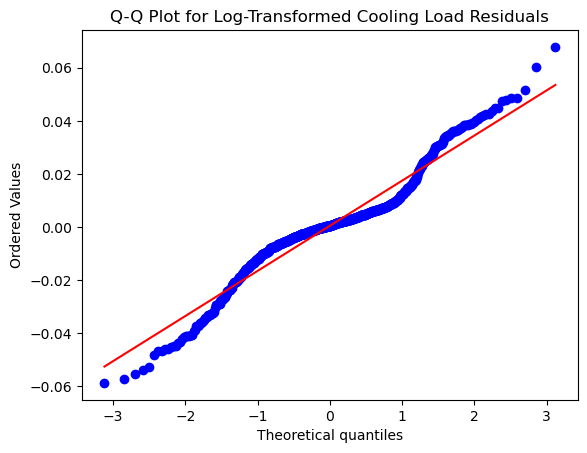

In [28]:
# Identifying outliers for further investigation
outliers_log = df[(residuals_cooling_log > 0.05) | (residuals_cooling_log < -0.05)]
print(outliers_log)


# Q-Q Plot for residuals
stats.probplot(residuals_cooling_log, dist="norm", plot=plt)
plt.title('Q-Q Plot for Log-Transformed Cooling Load Residuals')
plt.show()


Doesn't seem to be too many outliers to me. I wanted to see them in greater detail. Considering dropping them from the training data. 

In [29]:
# Identify data points with extreme residuals in the tails
outliers_high = df[residuals_cooling_log > 0.05]
outliers_low = df[residuals_cooling_log < -0.05]

num_outliers_high = len(outliers_high)
num_outliers_low = len(outliers_low)
total_num_outliers = num_outliers_high + num_outliers_low
total_num_data_points = len(df)

percentage_outliers = (total_num_outliers / total_num_data_points) * 100

print("Total number of outliers:", total_num_outliers)
print("Number of high residual outliers:", num_outliers_high)
print("Number of low residual outliers:", num_outliers_low)
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

Total number of outliers: 8
Number of high residual outliers: 3
Number of low residual outliers: 5
Percentage of outliers: 1.04%


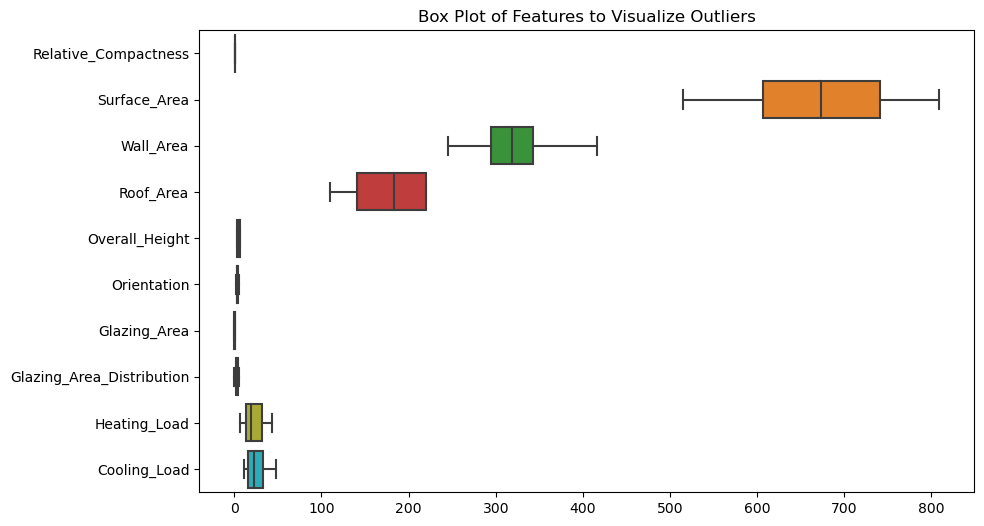

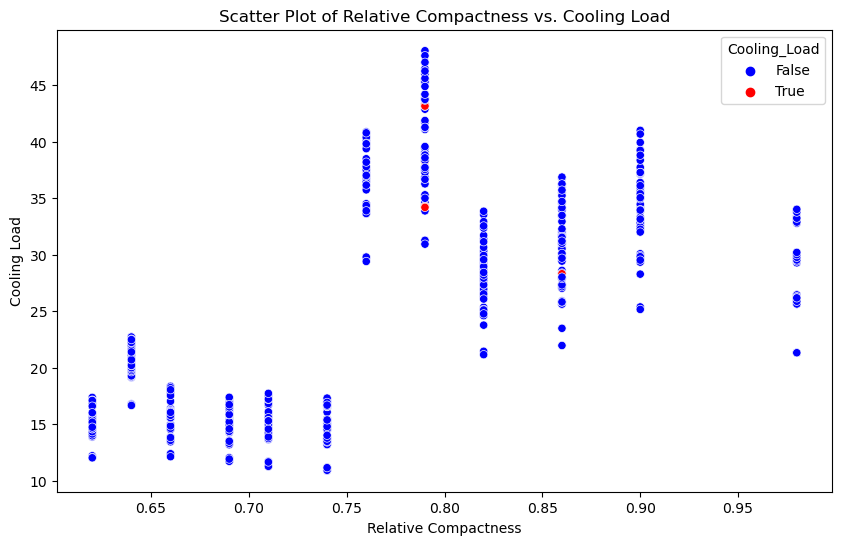

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot of Features to Visualize Outliers")
plt.show()

# Scatter plot to visualize the relationship between features and highlight outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Relative_Compactness'], y=df['Cooling_Load'], hue=residuals_cooling_log.abs() > 0.05, palette={False: 'blue', True: 'red'})
plt.title("Scatter Plot of Relative Compactness vs. Cooling Load")
plt.xlabel("Relative Compactness")
plt.ylabel("Cooling Load")
plt.show()


Making a decision not to worry about outliers. There are 5% of them in this dataset and I am getting in the weeds analyzing them with minimal impact on model performance. 

# Splitting the data along means to define the binary classes for heating and cooling load

# Step 1: Calculate the Means
heating_mean = y_heating.mean()
cooling_mean = y_cooling.mean()

# Step 2: Create Binary Classes
df['Heating_Load_Class'] = np.where(y_heating > heating_mean, 1, 0)
df['Cooling_Load_Class'] = np.where(y_cooling > cooling_mean, 1, 0)

# Drop the original Heating_Load and Cooling_Load columns
X = df.drop(columns=['Heating_Load', 'Cooling_Load', 'Heating_Load_Class', 'Cooling_Load_Class'])

# Step 3: Normalize the Features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Prepare the data for model training
y_heating_class = df['Heating_Load_Class']
y_cooling_class = df['Cooling_Load_Class']

# Split the data for heating load classification
X_train_heating, X_test_heating, y_train_heating_class, y_test_heating_class = train_test_split(X_normalized, y_heating_class, test_size=0.2, random_state=42)

# Split the data for cooling load classification
X_train_cooling, X_test_cooling, y_train_cooling_class, y_test_cooling_class = train_test_split(X_normalized, y_cooling_class, test_size=0.2, random_state=42)


In [31]:
# Calculate the Means
heating_mean = y_heating.mean()
cooling_mean = y_cooling.mean()

# Create Binary Classes
df['Heating_Load_Class'] = np.where(y_heating > heating_mean, 1, 0)
df['Cooling_Load_Class'] = np.where(y_cooling > cooling_mean, 1, 0)

# Drop the original Heating_Load and Cooling_Load columns
X = df.drop(columns=['Heating_Load', 'Cooling_Load', 'Heating_Load_Class', 'Cooling_Load_Class'])

# Normalize the Features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Prepare the data for model training
y_heating_class = df['Heating_Load_Class']
y_cooling_class = df['Cooling_Load_Class']

# Split the data for heating load classification
X_train_heating, X_test_heating, y_train_heating_class, y_test_heating_class = train_test_split(X_normalized, y_heating_class, test_size=0.2, random_state=42)

# Split the data for cooling load classification
X_train_cooling, X_test_cooling, y_train_cooling_class, y_test_cooling_class = train_test_split(X_normalized, y_cooling_class, test_size=0.2, random_state=42)

# Train the RandomForest Classifier for Heating Load Classification
rf_classifier_heating = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_heating.fit(X_train_heating, y_train_heating_class)

# Predict and Evaluate for Heating Load
y_pred_heating_class = rf_classifier_heating.predict(X_test_heating)
print("Heating Load Classification Report:")
print(classification_report(y_test_heating_class, y_pred_heating_class))
print("Heating Load Accuracy:", accuracy_score(y_test_heating_class, y_pred_heating_class))

# Train the RandomForest Classifier for Cooling Load Classification
rf_classifier_cooling = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_cooling.fit(X_train_cooling, y_train_cooling_class)

# Predict and Evaluate for Cooling Load
y_pred_cooling_class = rf_classifier_cooling.predict(X_test_cooling)
print("Cooling Load Classification Report:")
print(classification_report(y_test_cooling_class, y_pred_cooling_class))
print("Cooling Load Accuracy:", accuracy_score(y_test_cooling_class, y_pred_cooling_class))

Heating Load Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Heating Load Accuracy: 1.0
Cooling Load Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        80

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Cooling Load Accuracy: 1.0


In [32]:
# Calculate the Means
heating_mean = y_heating.mean()
cooling_mean = y_cooling.mean()

# Create Binary Classes
df['Heating_Load_Class'] = np.where(y_heating > heating_mean, 1, 0)
df['Cooling_Load_Class'] = np.where(y_cooling > cooling_mean, 1, 0)

# Drop the original Heating_Load and Cooling_Load columns
X = df.drop(columns=['Heating_Load', 'Cooling_Load', 'Heating_Load_Class', 'Cooling_Load_Class'])

# Normalize the Features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Prepare the data for model training
y_heating_class = df['Heating_Load_Class']
y_cooling_class = df['Cooling_Load_Class']

# Split the data for heating load classification
X_train_heating, X_test_heating, y_train_heating_class, y_test_heating_class = train_test_split(X_normalized, y_heating_class, test_size=0.2, random_state=42)

# Split the data for cooling load classification
X_train_cooling, X_test_cooling, y_train_cooling_class, y_test_cooling_class = train_test_split(X_normalized, y_cooling_class, test_size=0.2, random_state=42)

# Train the RandomForest Classifier for Heating Load Classification
rf_classifier_heating = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_heating.fit(X_train_heating, y_train_heating_class)

# Predict and Evaluate for Heating Load
y_pred_heating_class = rf_classifier_heating.predict(X_test_heating)
print("Heating Load Classification Report:")
print(classification_report(y_test_heating_class, y_pred_heating_class))
print("Heating Load Accuracy:", accuracy_score(y_test_heating_class, y_pred_heating_class))

# Train the RandomForest Classifier for Cooling Load Classification
rf_classifier_cooling = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_cooling.fit(X_train_cooling, y_train_cooling_class)

# Predict and Evaluate for Cooling Load
y_pred_cooling_class = rf_classifier_cooling.predict(X_test_cooling)
print("Cooling Load Classification Report:")
print(classification_report(y_test_cooling_class, y_pred_cooling_class))
print("Cooling Load Accuracy:", accuracy_score(y_test_cooling_class, y_pred_cooling_class))

# Cross-Validation to Check for Overfitting
# Cross-Validation for Heating Load Classification
cv_scores_heating = cross_val_score(rf_classifier_heating, X_normalized, y_heating_class, cv=5)
print("Cross-validated accuracy for Heating Load Classification:", cv_scores_heating)
print("Mean cross-validated accuracy for Heating Load Classification:", np.mean(cv_scores_heating))

# Cross-Validation for Cooling Load Classification
cv_scores_cooling = cross_val_score(rf_classifier_cooling, X_normalized, y_cooling_class, cv=5)
print("Cross-validated accuracy for Cooling Load Classification:", cv_scores_cooling)
print("Mean cross-validated accuracy for Cooling Load Classification:", np.mean(cv_scores_cooling))


Heating Load Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Heating Load Accuracy: 1.0
Cooling Load Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        80

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Cooling Load Accuracy: 1.0
Cross-validated accuracy for Heating Load Classification: [0.8961039 1.        1.        1.        1.       ]
Mean cross-validated accuracy for Heating Load Classification: 0.9792207792207792
Cross-validated accuracy for

# Update 7/29
This looks way overfit to me... 

The following functions were built around the RF model, which I later deemed to be overfitting. Left in place out of order of operations concerns. 

In [33]:
def predict_efficiency(new_data):
    # Ensure new_data is a numpy array and has the correct shape
    new_data = np.array(new_data).reshape(1, -1)
    # Normalize the new input data
    new_data_normalized = scaler.transform(new_data)
    
    # Predict using the trained classifiers
    heating_prediction = rf_classifier_heating.predict(new_data_normalized)
    cooling_prediction = rf_classifier_cooling.predict(new_data_normalized)
    
    # Interpret the predictions
    heating_efficiency = 'Efficient' if heating_prediction == 1 else 'Inefficient'
    cooling_efficiency = 'Efficient' if cooling_prediction == 1 else 'Inefficient'
    
    return heating_efficiency, cooling_efficiency

new_data_entry = [0.75, 600, 300, 150, 7, 3, 0.1, 2]  # dummy values for testing 
new_data_entry2 = [0.98, 514.5, 294, 110.25, 7, 2, 0, 0]  # dummy values for testing 
# Predict efficiency for the new data entry
heating_efficiency, cooling_efficiency = predict_efficiency(new_data_entry)

print(f"Heating Efficiency: {heating_efficiency}")
print(f"Cooling Efficiency: {cooling_efficiency}")


Heating Efficiency: Efficient
Cooling Efficiency: Efficient


## Some manual validation of my model
I wanted to see how accurate this model was at predicting heating and cooling load using my dataset, have it print the prediction as well as the actual number for the entry, then indicate whether or not the structure is efficient or inefficient based on the results. 

This is for my own testing purposes only. The final model will not have actual heating and cooling load numbers to compare against. 

In [34]:
X_train, X_test, y_train_heating, y_test_heating = train_test_split(X, y_heating, test_size=0.2, random_state=42)
X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train RandomForest models (if not already done)
best_rf_heating = RandomForestRegressor(n_estimators=100, random_state=42)
best_rf_cooling = RandomForestRegressor(n_estimators=100, random_state=42)
best_rf_heating.fit(X_train_scaled, y_train_heating)
best_rf_cooling.fit(X_train_scaled, y_train_cooling)

# Predict on the test set
y_pred_heating = best_rf_heating.predict(X_test_scaled)
y_pred_cooling = best_rf_cooling.predict(X_test_scaled)

# Calculate the means
heating_mean = y_heating.mean()
cooling_mean = y_cooling.mean()

# Classify efficiency based on predictions
predicted_heating_efficiency = np.where(y_pred_heating <= heating_mean, 'Efficient', 'Inefficient')
predicted_cooling_efficiency = np.where(y_pred_cooling <= cooling_mean, 'Efficient', 'Inefficient')

# Classify efficiency based on actual values
actual_heating_efficiency = np.where(y_test_heating <= heating_mean, 'Efficient', 'Inefficient')
actual_cooling_efficiency = np.where(y_test_cooling <= cooling_mean, 'Efficient', 'Inefficient')

# Combine the results into a DataFrame for comparison
results_df = pd.DataFrame({
    'Actual Heating Load': y_test_heating,
    'Predicted Heating Load': y_pred_heating,
    'Heating Efficiency (Actual)': actual_heating_efficiency,
    'Heating Efficiency (Predicted)': predicted_heating_efficiency,
    'Actual Cooling Load': y_test_cooling,
    'Predicted Cooling Load': y_pred_cooling,
    'Cooling Efficiency (Actual)': actual_cooling_efficiency,
    'Cooling Efficiency (Predicted)': predicted_cooling_efficiency
})

# Display the comparison for the first few entries
print(results_df.head())


     Actual Heating Load  Predicted Heating Load Heating Efficiency (Actual)  \
668                16.47                 15.5471                   Efficient   
324                13.17                 13.1532                   Efficient   
624                32.82                 32.8004                 Inefficient   
690                41.32                 42.0372                 Inefficient   
473                16.69                 16.7463                   Efficient   

    Heating Efficiency (Predicted)  Actual Cooling Load  \
668                      Efficient                16.90   
324                      Efficient                16.39   
624                    Inefficient                32.78   
690                    Inefficient                46.23   
473                      Efficient                19.76   

     Predicted Cooling Load Cooling Efficiency (Actual)  \
668                 16.9774                   Efficient   
324                 16.0526                   

Looking at the results above, I can see that the model is very close indeed. I am happy with these results. 

# Update - the model is overfitting. Back to the drawing board
Isolate the model from everything else in this notebook:

In [35]:
df2 = pd.read_csv('data/energy_efficiency_data.csv')

In [36]:
X = df2.drop(columns=['Heating_Load', 'Cooling_Load'])
y_heating = df2['Heating_Load']
y_cooling = df2['Cooling_Load']

# Split the data
X_train, X_test, y_train_heating, y_test_heating = train_test_split(X, y_heating, test_size=0.2, random_state=42)
X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Train and tune the RandomForest models for heating load
rf_heating = RandomForestRegressor(random_state=42)
grid_search_heating = GridSearchCV(estimator=rf_heating, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_heating.fit(X_train_scaled, y_train_heating)
best_rf_heating = grid_search_heating.best_estimator_

# Train and tune the RandomForest models for cooling load
rf_cooling = RandomForestRegressor(random_state=42)
grid_search_cooling = GridSearchCV(estimator=rf_cooling, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_cooling.fit(X_train_scaled, y_train_cooling)
best_rf_cooling = grid_search_cooling.best_estimator_

# Function to predict efficiency
def predict_efficiency(new_data):
    # Ensure new_data is a numpy array and has the correct shape
    new_data = np.array(new_data).reshape(1, -1)
    
    # Normalize the new input data
    new_data_normalized = scaler.transform(new_data)
    
    # Predict using the trained regression models
    predicted_heating_load = best_rf_heating.predict(new_data_normalized)[0]
    predicted_cooling_load = best_rf_cooling.predict(new_data_normalized)[0]
    
    # Calculate the means (these should be consistent with how you calculated them during training)
    heating_mean = y_heating.mean()
    cooling_mean = y_cooling.mean()
    
    # Classify based on whether predicted values are above or below the means
    heating_efficiency = 'Efficient' if predicted_heating_load <= heating_mean else 'Inefficient'
    cooling_efficiency = 'Efficient' if predicted_cooling_load <= cooling_mean else 'Inefficient'
    
    # Output predictions and classifications
    result = {
        'Predicted Heating Load': predicted_heating_load,
        'Predicted Cooling Load': predicted_cooling_load,
        'Heating Efficiency': heating_efficiency,
        'Cooling Efficiency': cooling_efficiency
    }
    
    return result

# Example new data entry (ensure this matches the feature order used during training)
new_data_entry = [0.75, 600, 300, 150, 7, 3, 0.1, 2]  # Example values for each feature
new_data_entry2 = [0.86, 588, 294, 147, 7, 2, 0, 0]  # Example values for each feature
new_data_entry3 = [0.74, 686, 245, 220.5, 3.5, 5, 0.1, 1]  # Example values for each feature
# Predict efficiency for the new data entry
prediction_results = predict_efficiency(new_data_entry3)
print(prediction_results)


{'Predicted Heating Load': 10.397142380952378, 'Predicted Cooling Load': 13.657925833333314, 'Heating Efficiency': 'Efficient', 'Cooling Efficiency': 'Efficient'}


In [37]:
X = df.drop(columns=['Heating_Load', 'Cooling_Load', 'Heating_Load_Class', 'Cooling_Load_Class'])
y_heating_class = df['Heating_Load_Class']
y_cooling_class = df['Cooling_Load_Class']

# Split the data for heating load classification
X_train_heating, X_test_heating, y_train_heating_class, y_test_heating_class = train_test_split(X, y_heating_class, test_size=0.2, random_state=42)

# Split the data for cooling load classification
X_train_cooling, X_test_cooling, y_train_cooling_class, y_test_cooling_class = train_test_split(X, y_cooling_class, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_heating_scaled = scaler.fit_transform(X_train_heating)
X_test_heating_scaled = scaler.transform(X_test_heating)
X_train_cooling_scaled = scaler.fit_transform(X_train_cooling)
X_test_cooling_scaled = scaler.transform(X_test_cooling)

# Train the Logistic Regression model for heating load classification
log_reg_heating = LogisticRegression(random_state=42)
log_reg_heating.fit(X_train_heating_scaled, y_train_heating_class)

# Train the Logistic Regression model for cooling load classification
log_reg_cooling = LogisticRegression(random_state=42)
log_reg_cooling.fit(X_train_cooling_scaled, y_train_cooling_class)

# Predict and evaluate for heating load classification
y_pred_heating_log_reg = log_reg_heating.predict(X_test_heating_scaled)
print("Heating Load Classification Report (Logistic Regression):")
print(classification_report(y_test_heating_class, y_pred_heating_log_reg))
print("Heating Load Accuracy (Logistic Regression):", accuracy_score(y_test_heating_class, y_pred_heating_log_reg))

# Predict and evaluate for cooling load classification
y_pred_cooling_log_reg = log_reg_cooling.predict(X_test_cooling_scaled)
print("Cooling Load Classification Report (Logistic Regression):")
print(classification_report(y_test_cooling_class, y_pred_cooling_log_reg))
print("Cooling Load Accuracy (Logistic Regression):", accuracy_score(y_test_cooling_class, y_pred_cooling_log_reg))

# Cross-validation for heating load classification
cv_scores_heating_log_reg = cross_val_score(log_reg_heating, X_train_heating_scaled, y_train_heating_class, cv=5)
print("Cross-validated accuracy for Heating Load Classification (Logistic Regression):", cv_scores_heating_log_reg)
print("Mean cross-validated accuracy for Heating Load Classification (Logistic Regression):", np.mean(cv_scores_heating_log_reg))

# Cross-validation for cooling load classification
cv_scores_cooling_log_reg = cross_val_score(log_reg_cooling, X_train_cooling_scaled, y_train_cooling_class, cv=5)
print("Cross-validated accuracy for Cooling Load Classification (Logistic Regression):", cv_scores_cooling_log_reg)
print("Mean cross-validated accuracy for Cooling Load Classification (Logistic Regression):", np.mean(cv_scores_cooling_log_reg))

Heating Load Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.98      1.00      0.99        79

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

Heating Load Accuracy (Logistic Regression): 0.987012987012987
Cooling Load Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.98      1.00      0.99        80

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

Cooling Load Accuracy (Logistic Regression): 0.987012987012987
Cross-validated accuracy for Heating Load Classification (Logistic Regression): [0.98373984 0.99186992 0